# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Jonathan Lokianto]
- **Email:** [jonathanlokianto@gmail.com]
- **ID Dicoding:** [jonathanlokianto]

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan jumlah penyewaan sepeda yang terdaftar (Registered) dengan yang tidak terdaftar (Casual)?
- Bagaimana performa penyewaan sepeda yang terjadi pada 10 bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [818]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter 
import seaborn as sns
import datetime

## Data Wrangling

### Gathering Data

In [7]:
day_df = pd.read_csv("Bike Sharing Dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
hour_df = pd.read_csv("Bike Sharing Dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dari kedua dataframe tersebut, didapatkan bahwa kedua data tersebut memiliki value yang mirip, bedanya hanya pada hour_df, data dibagi berdasarkan jam di setiap harinya

### Assessing Data

**Assess day_df**

In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Probelms:
1. dteday => Wrong datatype

In [19]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

_No Null datas found_

In [23]:
print("Jumlah data duplikat: ", day_df.duplicated().sum())

Jumlah data duplikat:  0


In [54]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Assess hour_df**

In [29]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Problems:
1. dteday => Wrong datatype

In [31]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

_No Null datas found_

In [34]:
print("Jumlah data duplikat: ", hour_df.duplicated().sum())

Jumlah data duplikat:  0


In [52]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- day_df memiliki kesalahan pada datatype dteday yang seharusnya datetime.
- hour_df memiliki kesalahan pada datatype dteday yang seharusnya datetime.

### Cleaning Data

**Cleaning day_df**

In [47]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Cleaning hour_df**

In [50]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Pembersihan data pada day_df dan hour_df cukup singkat dikarenakan kesalahannya hanya terletak pada datatype kedua dteday.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [56]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


_Melihat perbandingan data antara Casual, Registered untuk setiap musim_

In [830]:
day_df.groupby(by="season").agg(
    {
        "casual": ["mean", "min", "max", "std", "sum"],
        "registered":["mean", "min", "max", "std", "sum"],
        "cnt": ["mean", "min", "max", "std", "sum"]
    }
)

casual                                  registered             \
               mean  min   max         std     sum         mean  min   max   
season                                                                       
1        334.928177    9  3155  387.655561   60622  2269.204420  416  5315   
2       1106.097826  120  3410  737.590829  203522  3886.233696  674  6456   
3       1202.611702  118  3160  595.975032  226091  4441.691489  889  6917   
4        729.112360    2  3031  606.318118  129782  3999.050562   20  6946   

                                     cnt                                    
                std     sum         mean   min   max          std      sum  
season                                                                      
1       1200.269751  410726  2604.132597   431  7836  1399.942119   471348  
2       1353.375628  715067  4992.331522   795  8362  1695.977235   918589  
3       1304.626949  835038  5644.303191  1115  8714  1459.800381  1061129  
4       1444.782557  711831  4728.162921    22  8555  1699.615261   841613

_Perbandingan data penyewaan sepeda pada tahun 2011 dengan 2012_

In [834]:
day_df.groupby(by="yr").agg(
    {
        "casual": ["mean", "min", "max", "std", "sum"],
        "registered":["mean", "min", "max", "std", "sum"],
        "cnt": ["mean", "min", "max", "std", "sum"]
    }
)

casual                                 registered             \
           mean min   max         std     sum         mean  min   max   
yr                                                                      
0    677.402740   9  3065  556.269121  247252  2728.358904  416  4614   
1   1018.483607   2  3410  758.989897  372765  4581.450820   20  6946   

                                  cnt                                   
            std      sum         mean  min   max          std      sum  
yr                                                                      
0   1060.110413   995851  3405.761644  431  6043  1378.753666  1243103  
1   1424.331846  1676811  5599.934426   22  8714  1788.667868  2049576

_Perbadingan data penyewaan sepeda untuk setiap bulan_

In [836]:
day_df.groupby(by="mnth").agg(
    {
        "casual": ["mean", "min", "max", "std", "sum"],
        "registered":["mean", "min", "max", "std", "sum"],
        "cnt": ["mean", "min", "max", "std", "sum"]
    }
)

casual                                 registered              \
             mean  min   max         std    sum         mean   min   max   
mnth                                                                       
1      194.225806    9  1070  197.384490  12042  1982.112903   416  4185   
2      262.508772   47  1435  232.283549  14963  2392.789474   905  4546   
3      716.838710   46  3155  624.308094  44444  2975.419355   491  5893   
4     1013.366667  120  3252  738.345585  60802  3471.533333   674  5950   
5     1214.274194  255  3410  754.950311  75285  4135.500000  2213  6433   
6     1231.766667  477  2963  664.017647  73906  4540.600000  2993  6456   
7     1260.596774  562  3065  598.382778  78157  4303.080645  2298  6790   
8     1161.919355  226  2827  466.576274  72039  4502.500000   889  6541   
9     1172.050000  118  3160  738.378375  70323  4594.466667  1689  6946   
10     963.870968    2  3031  703.205576  59760  4235.354839    20  6911   
11     610.050000   69  2290  470.933096  36603  3637.133333   935  5520   
12     349.887097    9  1153  222.634531  21693  3053.919355   432  6055   

                                   cnt                                   
              std     sum         mean   min   max          std     sum  
mnth                                                                     
1     1053.274474  122891  2176.338710   431  4521  1161.674370  134933  
2     1091.126003  136389  2655.298246  1005  5062  1145.313307  151352  
3     1513.254354  184476  3692.258065   605  8362  1899.301812  228920  
4     1414.571151  208292  4484.900000   795  7460  1776.160778  269094  
5     1093.179612  256401  5349.774194  2633  8294  1298.711561  331686  
6     1012.958885  272436  5772.366667  3767  8120  1240.400031  346342  
7     1190.542490  266791  5563.677419  3285  8173  1273.751871  344948  
8     1335.126601  279155  5664.419355  1115  7865  1494.516146  351194  
9     1547.716749  275668  5766.516667  1842  8714  1810.130649  345991  
10    1685.022519  262592  5199.225806    22  8156  1988.392517  322352  
11    1219.589045  218228  4247.183333  1495  6852  1285.712709  254831  
12    1465.052959  189343  3403.806452   441  6606  1549.639353  211036

Data rata-rata dari jumlah penyewaan sepeda di setiap bulan

In [542]:
avg_recent_data = recent_data.groupby(by="mnth").agg(
    {
        "casual": "mean",
        "registered":"mean",
        "cnt": "mean"
    }
)

avg_recent_data.rename(columns={
    "casual": "mean_casual",
    "registered": "mean_registered",
    "cnt":"mean_both"
})

,mean_casual,mean_registered,mean_both
mnth,,,
7,968.000000,6248.000000,7216.000000
8,1393.451613,5526.000000,6919.451613
9,1459.266667,5826.500000,7285.766667
10,1114.129032,5300.096774,6414.225806
11,700.300000,4388.500000,5088.800000
12,427.258065,3563.483871,3990.741935


### Explore hour_df

In [97]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


_Melihat perbandingan data antara Casual, Registered untuk setiap jam_

In [839]:
hour_df.groupby(by="hr").agg(
    {
        "casual": ["mean", "min", "max", "std", "sum"],
        "registered":["mean", "min", "max", "std", "sum"],
        "cnt": ["mean", "min", "max", "std", "sum"]
    }
)

casual                             registered                       \
         mean min  max        std    sum        mean min  max         std   
hr                                                                          
0   10.158402   0   68  10.667953   7375   43.739669   0  234   34.019585   
1    6.504144   0   49   7.735334   4709   26.871547   0  139   27.344153   
2    4.772028   0   44   6.514780   3412   18.097902   0  104   21.303895   
3    2.715925   0   26   4.315795   1893    9.011478   0   61    9.743691   
4    1.253945   0   13   1.887669    874    5.098996   0   22    3.134479   
5    1.411437   0   16   1.790581   1012   18.478382   0   64   12.674751   
6    4.161379   0   19   3.691509   3017   71.882759   0  203   53.535307   
7   11.055021   0   40   8.356205   8037  201.009629   1  572  157.120459   
8   21.679505   0   69  13.741229  15761  337.331499   4  808  229.698404   
9   30.891334   0  142  24.472856  22458  188.418157   6  399   84.633490   
10  46.477304   0  209  41.346206  33789  127.191197   8  351   66.281668   
11  59.540578   0  268  54.481788  43286  148.602476   5  446   79.090301   
12  68.293956   0  362  64.394237  49718  185.021978   3  526   89.240873   
13  72.308642   0  355  69.819228  52713  181.352538   9  491   87.424775   
14  75.567901   0  361  71.599225  55089  165.381344  12  502   84.055205   
15  74.905350   0  357  70.289359  54606  176.327846   4  456   84.488219   
16  73.745205   0  367  67.015206  53834  238.238356   8  481  103.765726   
17  74.273973   0  347  61.491021  54220  387.178082  14  885  211.676303   
18  61.120879   0  266  50.981553  44496  364.390110  20  886  203.599896   
19  48.770604   0  230  42.328913  35505  262.752747  11  662  138.708622   
20  36.233516   0  237  32.103347  26378  189.796703   8  461  100.293791   
21  28.255495   0  222  25.378252  20570  144.059066   6  362   73.149848   
22  22.252747   0  175  20.450211  16200  109.082418   5  327   55.252765   
23  15.199176   0   71  13.804596  11065   72.631868   2  220   40.446431   

                   cnt                               
       sum        mean min  max         std     sum  
hr                                                   
0    31755   53.898072   2  283   42.307910   39130  
1    19455   33.375691   1  168   33.538727   24164  
2    12940   22.869930   1  132   26.578642   16352  
3     6281   11.727403   1   79   13.239190    8174  
4     3554    6.352941   1   28    4.143818    4428  
5    13249   19.889819   1   66   13.200765   14261  
6    52115   76.044138   1  213   55.084348   55132  
7   146134  212.064649   1  596  161.441936  154171  
8   245240  359.011004   5  839  235.189285  261001  
9   136980  219.309491  14  426   93.703458  159438  
10   92468  173.668501   8  539  102.205413  126257  
11  108034  208.143054  10  663  127.495536  151320  
12  134696  253.315934   3  776  145.081134  184414  
13  132206  253.661180  11  760  148.107657  184919  
14  120563  240.949246  12  750  147.271574  175652  
15  128543  251.233196   7  750  144.632541  183149  
16  173914  311.983562  11  783  148.682618  227748  
17  282640  461.452055  15  976  232.656611  336860  
18  265276  425.510989  23  977  224.639304  309772  
19  191284  311.523352  11  743  161.050359  226789  
20  138172  226.030220  11  567  119.670164  164550  
21  104875  172.314560   6  584   89.788893  125445  
22   79412  131.335165   9  502   69.937782   95612  
23   52876   87.831044   2  256   50.846889   63941

**Insight:**
- Dari hasil analisa exploratory pada data day_df, didapatkan variabel yang dapat membantu menjawab pertanyaan bisnis

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan jumlah penyewaan sepeda yang terdaftar (Registered) dengan yang tidak terdaftar (Casual)?

In [844]:
day_df.groupby(by="yr").agg(
    {
        "casual": "sum",
        "registered":"sum"
    }
)

,casual,registered
yr,,
0,247252,995851
1,372765,1676811


Memvisualisasikan data dalam bentuk barplot

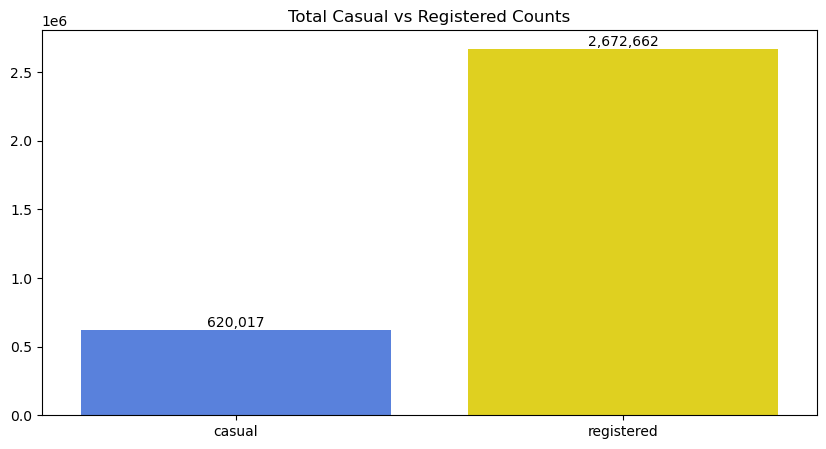

In [846]:
sum_df = day_df[['casual', 'registered']].sum().reset_index()
sum_df.columns = ['type', 'sum']
colors = ['#4379F2', '#FFEB00']

plt.figure(figsize=(10, 5))
sns.barplot(
    data=sum_df.sort_values(by="sum", ascending=True), 
    x='type', 
    y='sum',
    hue='type',
    palette=colors
    
)
for index, value in enumerate(sum_df['sum']):
    formatted_value = f"{value:,.0f}"
    plt.text(index, value, formatted_value, ha='center', va='bottom')

plt.title('Total Casual vs Registered Counts')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

### Pertanyaan 2: Bagaimana performa penyewaan sepeda yang terjadi pada 10 bulan terakhir?

Mendapatkan data dari 10 bulan terakhir

In [848]:
monthly_data_df = day_df.resample(rule="ME", on="dteday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt":"sum"
})

monthly_data_df = monthly_data_df.reset_index()
monthly_data_df.rename(columns={
    "casual": "Total Casual Cyclist",
    "registered": "Total Registered Cyclist",
    "cnt":"Total Casual & Registered Cyclist"
}, inplace=True)

monthly_data_df.tail()

,dteday,Total Casual Cyclist,Total Registered Cyclist,Total Casual & Registered Cyclist
19,2012-08-31,43197,171306,214503
20,2012-09-30,43778,174795,218573
21,2012-10-31,34538,164303,198841
22,2012-11-30,21009,131655,152664
23,2012-12-31,13245,110468,123713


Memvisualisasikan data:

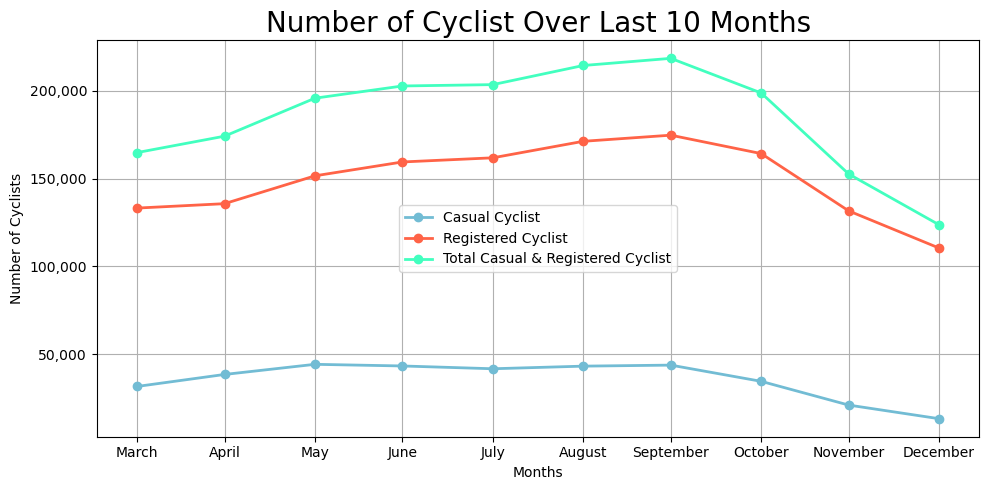

In [873]:
last_ten_months = monthly_data_df.tail(10)
last_ten_months.loc[:, 'dteday'] = pd.to_datetime(last_ten_months['dteday'])

plt.figure(figsize=(10, 5))
plt.plot(
    last_ten_months["dteday"],
    last_ten_months["Total Casual Cyclist"],
    marker='o', 
    linewidth=2,
    color="#72BCD4",
    label="Casual Cyclist"
)

plt.plot(
    last_ten_months["dteday"],
    last_ten_months["Total Registered Cyclist"],
    marker='o', 
    linewidth=2,
    color="#FF6347",
    label="Registered Cyclist"
)

plt.plot(
    last_ten_months["dteday"],
    last_ten_months["Total Casual & Registered Cyclist"],
    marker='o', 
    linewidth=2,
    color="#42ffbf",
    label="Total Casual & Registered Cyclist"
)


plt.title("Number of Cyclist Over Last 10 Months", loc="center", fontsize=20)
plt.xlabel("Months")
plt.ylabel("Number of Cyclists")
plt.legend()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))
formatter = FuncFormatter(lambda x, _: f"{int(x):,}")
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(last_ten_months['dteday'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

**Clustering Analysis: Binning**

In [769]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Menentukan binning dari kolom Temperature, Humidity, dan Windspeed

In [862]:
binning_df = pd.DataFrame(day_df)
binning_df['temp']=pd.cut(binning_df['temp'], bins=3, labels=['Low', 'Medium', 'High'])
binning_df['humidity']=pd.cut(binning_df['hum'], bins=4, labels=[' Low', 'Moderate', 'High' , 'Very high'])
binning_df['windspeed']=pd.cut(binning_df['windspeed'], bins=3, labels=[' Fresh Breeze', 'Moderate Breeze','Strong Breeze'])
binning_df[[
    'instant',
    'temp',
    'humidity',
    'windspeed'
]]

,instant,temp,humidity,windspeed
0,1,Medium,Very high,Fresh Breeze
1,2,Medium,High,Moderate Breeze
2,3,Low,Moderate,Moderate Breeze
3,4,Low,High,Fresh Breeze
4,5,Low,Moderate,Moderate Breeze
...,...,...,...,...
726,727,Low,High,Strong Breeze
727,728,Low,High,Fresh Breeze
728,729,Low,Very high,Fresh Breeze
729,730,Low,Moderate,Strong Breeze


Memvisualisasikan data binning

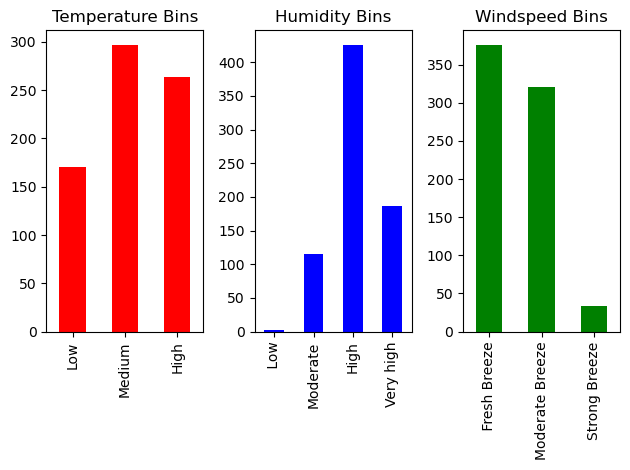

In [894]:
plt.subplot(1, 3, 1)
binning_df['temp'].value_counts().sort_index().plot(kind='bar', color='red', title='Temperature Bins')
plt.xticks(rotation=90)
plt.xlabel(None)

plt.subplot(1, 3, 2)
binning_df['humidity'].value_counts().sort_index().plot(kind='bar', color='blue', title='Humidity Bins')
plt.xticks(rotation=90)
plt.xlabel(None)

plt.subplot(1, 3, 3)
binning_df['windspeed'].value_counts().sort_index().plot(kind='bar', color='green', title='Windspeed Bins')
plt.xticks(rotation=90)
plt.xlabel(None)

plt.tight_layout()

plt.show()

## Conclusion

- Perbandingan nilai jumlah penyewaan sepeda yang terdaftar dengan yang tidak terdaftar adalah 2,672,662 dengan 620,017 jumlah penyewaan yang terjadi
- Jumlah penyewaan sepeda paling banyak terjadi pada bulan september lalu yang nilainya melebihi 200,000 jumlah pengguna sepeda yang terdaftar dengan yang tidak terdaftar